In [174]:
##I do declare!

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA
from statsmodels.multivariate.pca import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.datasets import load_boston
import statsmodels.api as sm

In [175]:
##load the data
filename = input('Feed me Data!\n (enter filepath)\n') ##enter your file path here - the file is in the repo "summary_stats.csv".
df=pd.read_csv(filename)
df.head(10)

,key,seed,maxLiqRatio,askFactor,cushionFactor,wall,cushion,mintSyncPremium,withReinstateWindow,withDynamicRR,...,avg_marketcap,dev_marketcap,avg_price,dev_treasury,avg_treasury,dev_price,avg_liqUSD,dev_liqUSD,avg_liqOHM,dev_liqOHM
0,605_1124,605,0.500,0.09,0.475,0.26,0.17,3,Yes,No,...,3.711972e+09,1.948129e+09,58.194592,12.491614,2.852553e+08,1.912714e+07,7.421002e+07,3.424769e+07,7.421002e+07,3.424769e+07
1,28_136,28,0.500,0.09,0.150,0.26,0.20,3,No,No,...,4.187020e+09,3.471914e+09,59.600932,28.637819,2.690421e+08,1.772427e+07,7.193483e+07,4.449844e+07,7.193483e+07,4.449844e+07
2,85_1015,85,0.500,0.09,0.150,0.21,0.16,3,No,Yes,...,3.561432e+09,2.349049e+09,54.401663,17.957348,2.634923e+08,1.298447e+07,7.196177e+07,3.838210e+07,7.196177e+07,3.838210e+07
3,180_1280,180,0.500,0.09,0.500,0.20,0.12,3,No,Yes,...,3.627506e+09,2.591385e+09,53.986905,18.100865,2.816208e+08,1.934403e+07,7.239924e+07,4.015662e+07,7.239924e+07,4.015662e+07
4,206_1286,206,0.475,0.09,0.400,0.20,0.14,3,No,No,...,3.010845e+09,1.921307e+09,47.150067,12.206990,2.539030e+08,1.406776e+07,6.809700e+07,3.521187e+07,6.809700e+07,3.521187e+07
5,982_1156,982,0.500,0.09,0.500,0.20,0.10,3,No,Yes,...,2.812866e+09,1.550824e+09,45.042645,9.293354,2.574882e+08,8.385540e+06,6.504514e+07,3.081772e+07,6.504514e+07,3.081772e+07
6,91_1271,91,0.500,0.09,0.450,0.27,0.19,3,Yes,No,...,4.315699e+09,1.857979e+09,70.458989,16.047960,3.141733e+08,2.346215e+07,8.484293e+07,3.447905e+07,8.484293e+07,3.447905e+07
7,804_1117,804,0.475,0.09,0.350,0.24,0.20,3,No,Yes,...,2.821123e+09,1.559639e+09,44.351316,9.725232,2.692599e+08,1.953178e+07,6.081493e+07,2.846364e+07,6.081493e+07,2.846364e+07
8,333_1071,333,0.475,0.09,0.475,0.30,0.20,3,Yes,No,...,4.777142e+09,2.619092e+09,75.240771,20.043063,2.939258e+08,1.262572e+07,8.912624e+07,4.254914e+07,8.912624e+07,4.254914e+07
9,563_1090,563,0.500,0.09,0.500,0.28,0.12,3,No,No,...,4.082531e+09,2.503690e+09,62.068327,16.558504,3.042954e+08,1.799496e+07,8.075624e+07,4.102194e+07,8.075624e+07,4.102194e+07


<AxesSubplot:xlabel='withDynamicRR', ylabel='avg_liqUSD'>

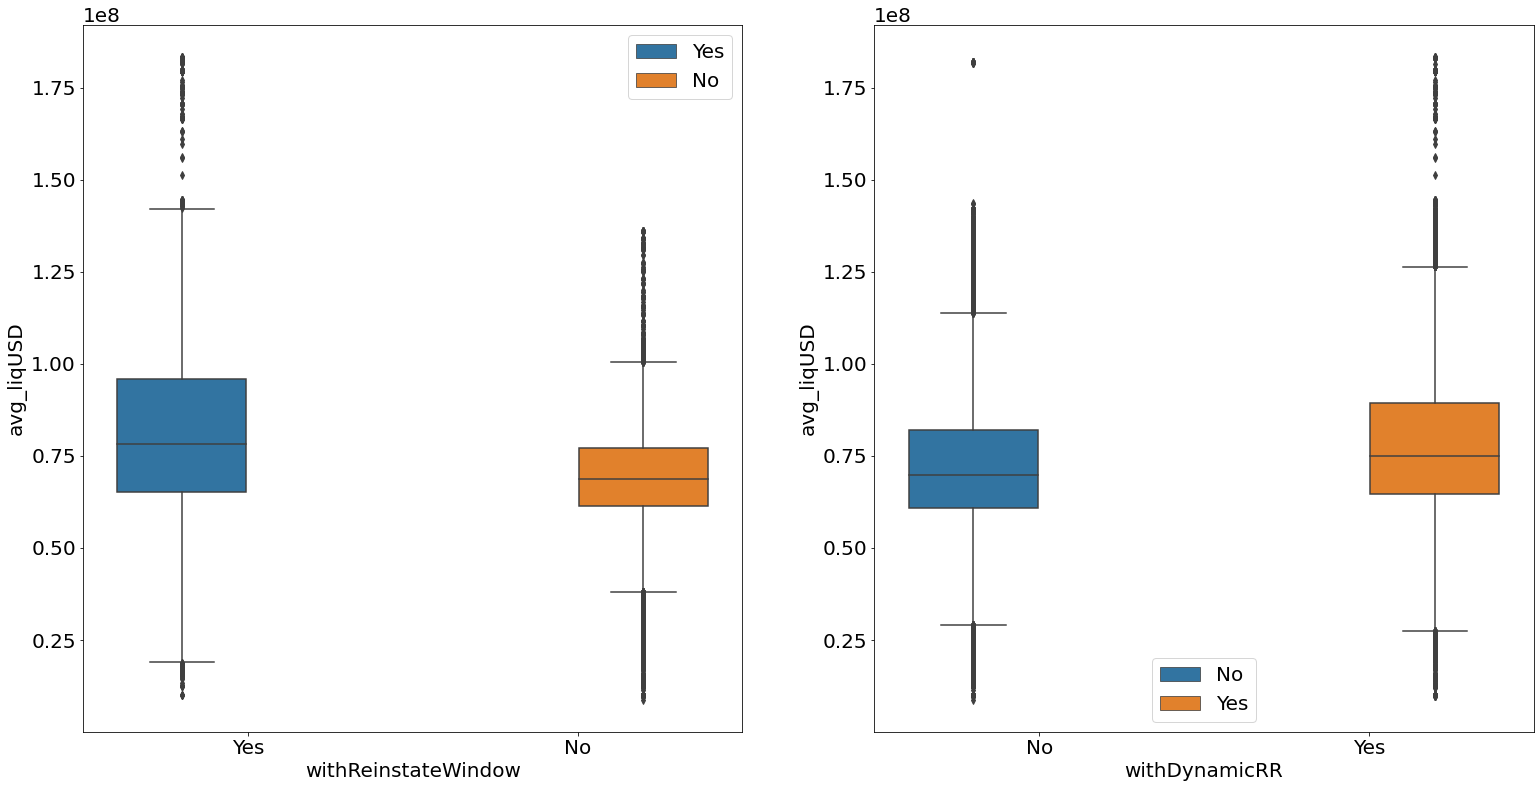

In [183]:
##fancy charts, but too much data on first load. Let's see if the window or dynamicRR make for a visual difference in avg netflow
plt.rc("figure", figsize=(26, 13))
plt.rc("font", size=20)

fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=df, x="withReinstateWindow", y="avg_liqUSD", hue=df.withReinstateWindow.tolist(), ax=axs[0])
sns.boxplot(data=df, x="withDynamicRR", y="avg_liqUSD", hue=df.withDynamicRR.tolist(), ax=axs[1])
##plt.show()

<AxesSubplot:xlabel='withDynamicRR', ylabel='avg_marketcap'>

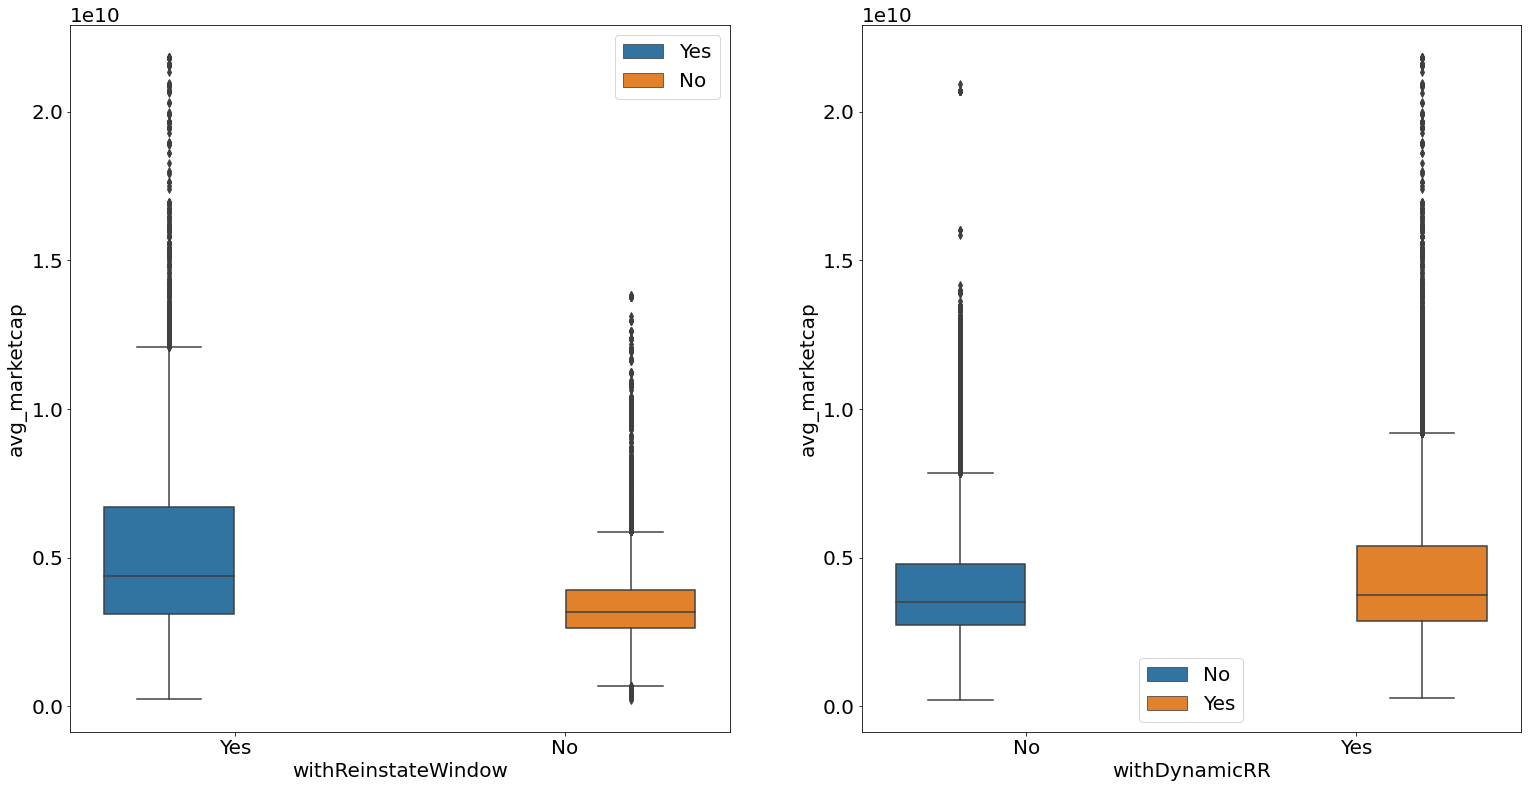

In [182]:
fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=df, x="withReinstateWindow", y="avg_marketcap", hue=df.withReinstateWindow.tolist(), ax=axs[0])
sns.boxplot(data=df, x="withDynamicRR", y="avg_marketcap", hue=df.withDynamicRR.tolist(), ax=axs[1])

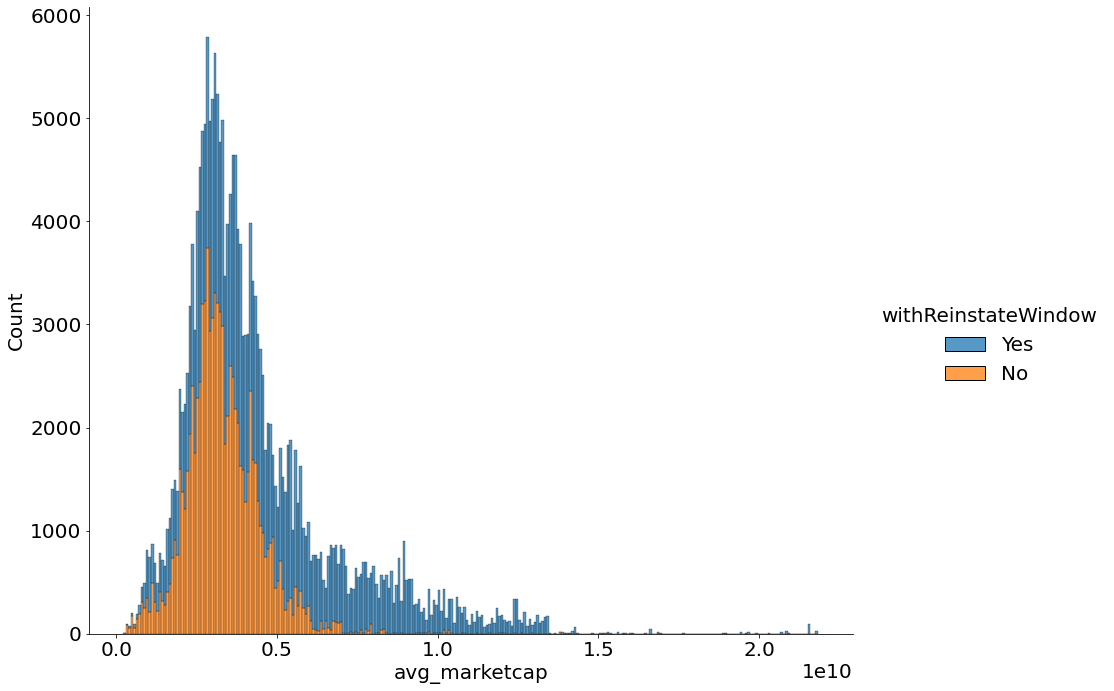

In [221]:
sns.displot(data=df, x="avg_marketcap", hue="withReinstateWindow", multiple="stack",height = 10, aspect = 1.25 )

##g = sns.relplot(data=df3, x="cushion", y="avg_netflow")
##g.set_axis_labels("wall", "net flow")

<AxesSubplot:xlabel='withDynamicRR', ylabel='avg_marketcap'>

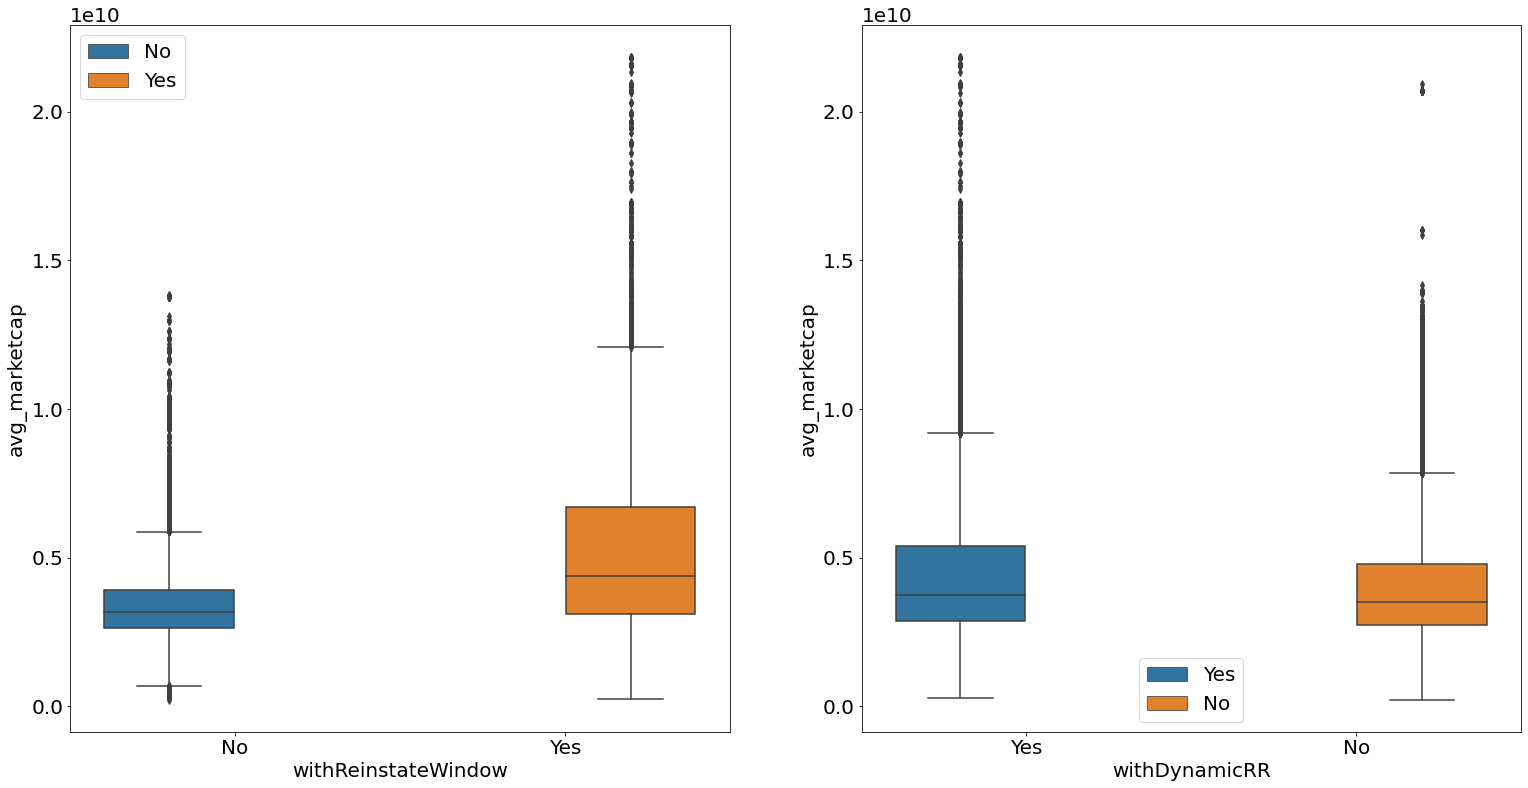

In [115]:
fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=df, x="withReinstateWindow", y="avg_marketcap", hue=df.withReinstateWindow.tolist(), ax=axs[0])
sns.boxplot(data=df, x="withDynamicRR", y="avg_marketcap", hue=df.withDynamicRR.tolist(), ax=axs[1])

I am not seeing too much of an effect on the yearly means of marketcap

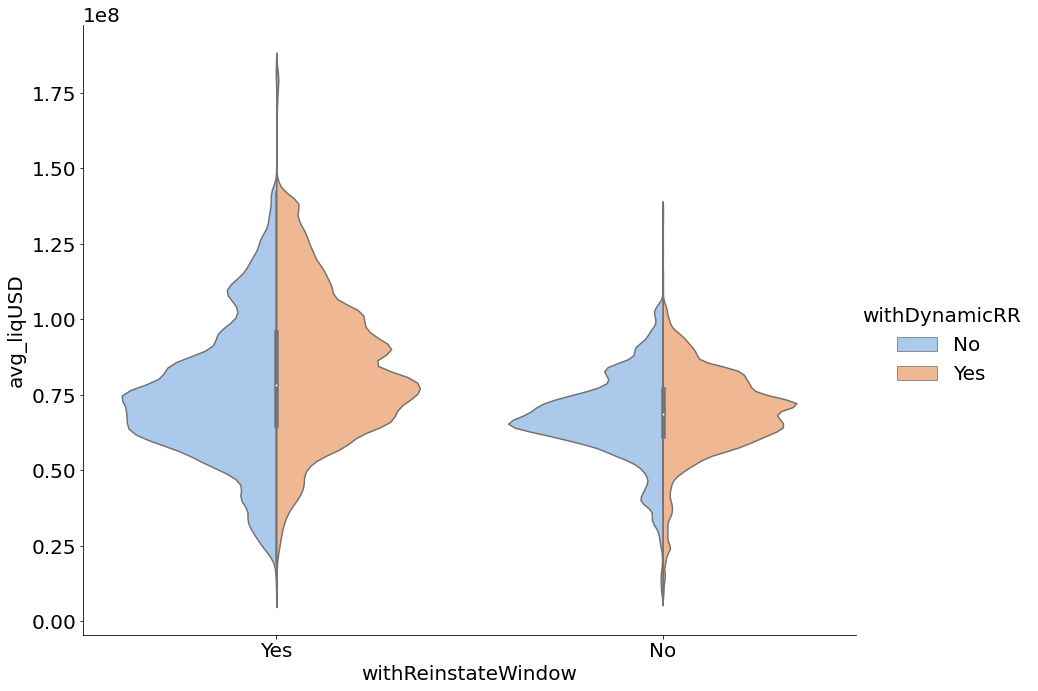

In [201]:
sns.catplot(x="withReinstateWindow", y="avg_liqUSD", hue="withDynamicRR",
            kind="violin", split=True,
            palette="pastel", data=df
            ,height = 10, aspect = 1.25)

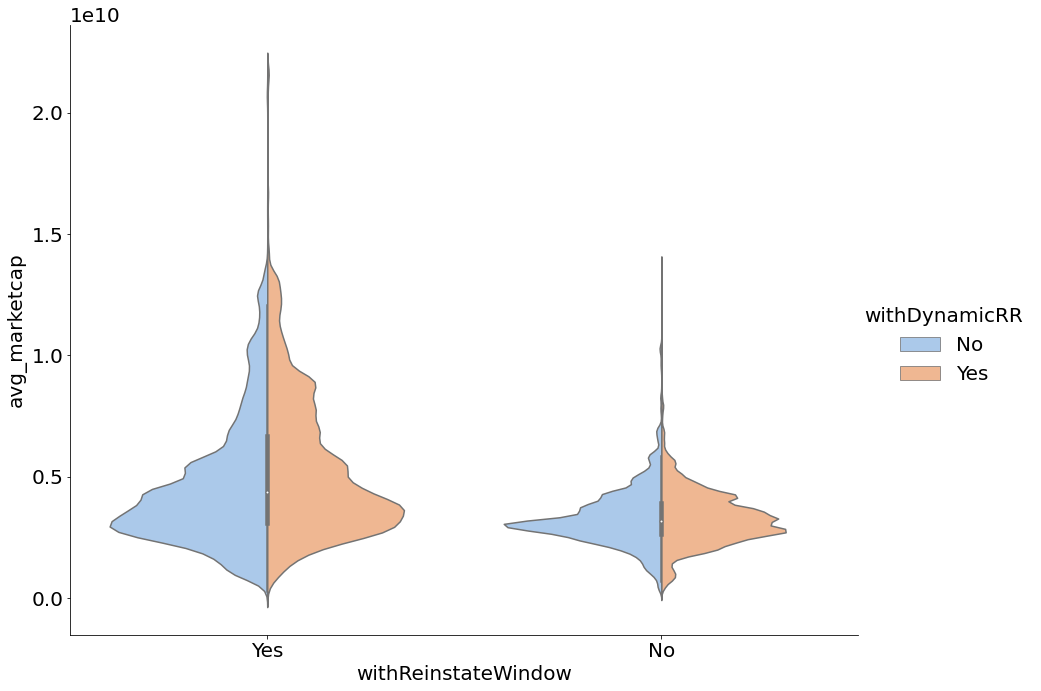

In [207]:
sns.catplot(x="withReinstateWindow", y="avg_marketcap", hue="withDynamicRR",
            kind="violin", split=True,
            palette="pastel", data=df
            ,height = 10, aspect = 1.25)

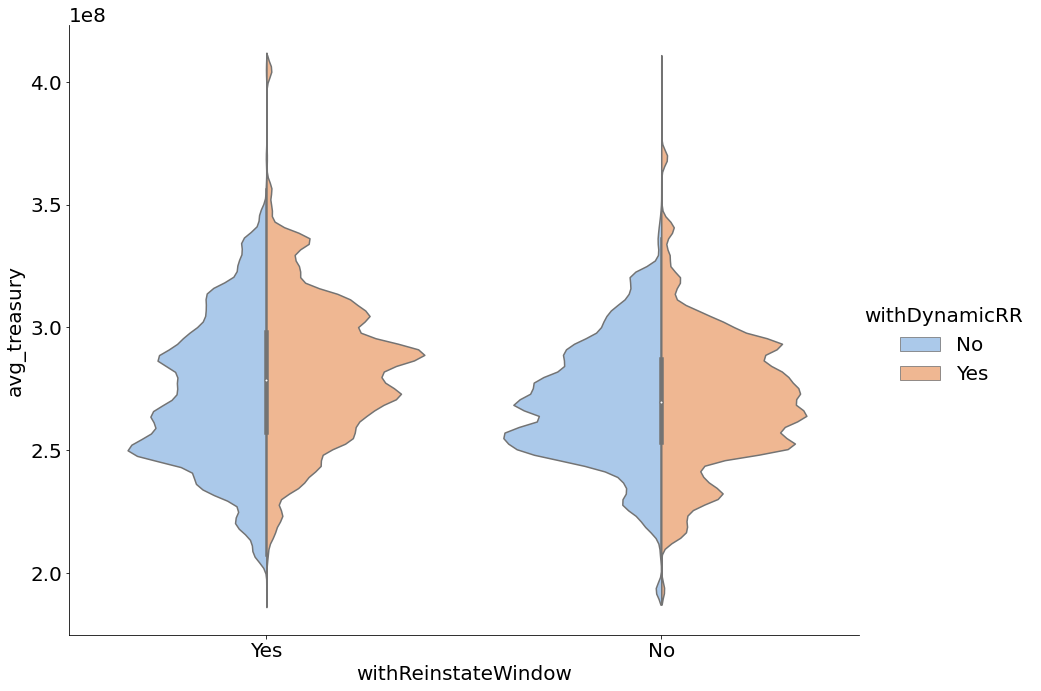

In [213]:
sns.catplot(x="withReinstateWindow", y="avg_treasury", hue="withDynamicRR",
            kind="violin", split=True,
            palette="pastel", data=df
            ,height = 10, aspect = 1.25)

A bit about MANOVAs

MANOVA makes the following assumptions:
Residuals follow a multivariate normal prob dist (means equal to zero)
Variance-covariance matrices of each group of residuals are equal
Observations are independent

Unless I do some validation I can only be sure of the third assumption. Dammit

In [204]:
##Let's Manova, baby. The first set of variables are the dependent variables, followed by the independent. In this case, let's test that avg marketcap and netflow are driven by the parameters
fit = MANOVA.from_formula('avg_marketcap + avg_liqUSD ~ maxLiqRatio + askFactor + cushionFactor +wall + cushion + mintSyncPremium', data=df)
print(fit.mv_test())

                     Multivariate linear model
                                                                   
-------------------------------------------------------------------
        Intercept        Value  Num DF    Den DF    F Value  Pr > F
-------------------------------------------------------------------
           Wilks' lambda 0.9322 2.0000 208450.0000 7580.6537 0.0000
          Pillai's trace 0.0678 2.0000 208450.0000 7580.6537 0.0000
  Hotelling-Lawley trace 0.0727 2.0000 208450.0000 7580.6537 0.0000
     Roy's greatest root 0.0727 2.0000 208450.0000 7580.6537 0.0000
-------------------------------------------------------------------
                                                                   
-------------------------------------------------------------------
       maxLiqRatio       Value  Num DF    Den DF    F Value  Pr > F
-------------------------------------------------------------------
           Wilks' lambda 0.9154 2.0000 208450.0000 9629.2264 0.0000
 

Wilk’s lambda tests if there are differences between group means for a particular combination of dependent variables. It is similar to the F-test statistic in ANOVA. Lambda is a measure of the percent variance in dependent variables not explained by differences in levels of the independent variable. A value of zero means that there isn’t any variance not explained by the independent variable (which is ideal). In other words, the closer to zero the statistic is, the more the variable in question contributes to the model. You would reject the null hypothesis when Wilk’s lambda is close to zero, although this should be done in combination with a small p-value.

The closer Pillai’s trace is to 1, the stronger the evidence that the explanatory variable has a statistically significant effect on the values of the response variables.

A MANOVA's null hypothesis is that the means of all treatments are equal. A large P-value means the model is insignificant.

Based on the values I see above, it does not look like we can do that. Therefore, we cannot be confident that these factors alone drive the yearly avg of marketcap, net flow or price.

At least, assuming a MANOVA is appropriate to use in this scenario. I strongly suspect this is the case. But what do I know? I am just an ex- biologist.

In [219]:
##throwing in all three into the mix, because why not?
fit = MANOVA.from_formula('avg_price + avg_marketcap +avg_liqUSD ~ maxLiqRatio + askFactor + cushionFactor +wall + cushion + mintSyncPremium', data=df)
print(fit.mv_test())

                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept        Value  Num DF    Den DF     F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda 0.1999 6.0000 208449.0000 139084.3484 0.0000
         Pillai's trace 0.8001 6.0000 208449.0000 139084.3484 0.0000
 Hotelling-Lawley trace 4.0034 6.0000 208449.0000 139084.3484 0.0000
    Roy's greatest root 4.0034 6.0000 208449.0000 139084.3484 0.0000
--------------------------------------------------------------------
                                                                    
--------------------------------------------------------------------
         avg_price        Value  Num DF    Den DF    F Value  Pr > F
--------------------------------------------------------------------
            Wilks' lambda 0.8824 6.0000 208449.0000 4631

In [218]:
##let's check for the dummy variables impact on their own
fit = MANOVA.from_formula('avg_treasury + avg_liqOHM ~ maxLiqRatio + askFactor + cushionFactor +wall + cushion + mintSyncPremium , data=df)
print(fit.mv_test())

                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept        Value  Num DF    Den DF     F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda 0.4320 2.0000 208449.0000 137055.8305 0.0000
         Pillai's trace 0.5680 2.0000 208449.0000 137055.8305 0.0000
 Hotelling-Lawley trace 1.3150 2.0000 208449.0000 137055.8305 0.0000
    Roy's greatest root 1.3150 2.0000 208449.0000 137055.8305 0.0000
--------------------------------------------------------------------
                                                                    
--------------------------------------------------------------------
       maxLiqRatio       Value  Num DF    Den DF    F Value   Pr > F
--------------------------------------------------------------------
           Wilks' lambda 0.8342 2.0000 208449.0000 20715

Ok - clearly we need to find more approaches to this problem. I suspect it's because the assumptions for a Manova are not met. Will have to inspect after all.

This next bit is me playing around trying to get a sense of how the data is shaped.

In [ ]:
##hmmm let's do some experimenting. I downloaded the daily data for key 449_1196
##df1 = df.query("key == '449_1196'")
##df1.head(10)

In [139]:
filename2 = input('Feed me a year\'s worth Data!\n (enter filepath)\n') ##enter your file path here - the file is in the repo "summary_stats.csv".
df2=pd.read_csv(filename2)
df2.head(10)

,seed,key,day,netFlow,price,realTarget,lowerTargetCushion,upperTargetCushion,lowerTargetWall,upperTargetWall,...,bidCapacityTargetCushion,askCapacityTargetCushion,bidCapacityTarget,askCapacityTarget,askCount,bidCount,marketDemand,marketSupply,netTotal,gohm7dVolatility
0,781,781_0,2,-430049.971827,30.955367,30.0,27.0,33.0,22.8,37.2,...,6375000.0,2.639113e+06,21250000.0,8.797043e+06,7,7,0.021898,-0.013621,0.008278,0.0
1,781,781_1,2,-430049.971827,30.709202,30.0,25.2,34.8,22.8,37.2,...,8500000.0,3.518817e+06,21250000.0,8.797043e+06,7,7,0.021898,-0.013621,0.008278,0.0
2,781,781_10,2,-430049.971827,30.709202,30.0,24.0,36.0,21.9,38.1,...,1375000.0,6.207349e+05,13750000.0,6.207349e+06,7,7,0.021898,-0.013621,0.008278,0.0
3,781,781_100,2,-430049.971827,30.955367,30.0,24.6,35.4,24.0,36.0,...,5625000.0,2.031250e+06,22500000.0,8.125000e+06,7,7,0.021898,-0.013621,0.008278,0.0
4,781,781_1000,2,-430049.971827,30.955367,30.0,24.9,35.1,22.8,37.2,...,2500000.0,1.034946e+06,6250000.0,2.587366e+06,7,7,0.021898,-0.013621,0.008278,0.0
5,781,781_1001,2,-430049.971827,30.955367,30.0,24.9,35.1,22.8,37.2,...,3500000.0,1.448925e+06,10000000.0,4.139785e+06,7,7,0.021898,-0.013621,0.008278,0.0
6,781,781_1002,2,-430049.971827,30.955367,30.0,24.9,35.1,22.8,37.2,...,9375000.0,3.881048e+06,25000000.0,1.034946e+07,7,7,0.021898,-0.013621,0.008278,0.0
7,781,781_1003,2,-430049.971827,30.955367,30.0,24.9,35.1,23.4,36.6,...,9375000.0,3.637295e+06,25000000.0,9.699454e+06,7,7,0.021898,-0.013621,0.008278,0.0
8,781,781_1004,2,-430049.971827,30.955367,30.0,25.2,34.8,22.8,37.2,...,8312500.0,3.441196e+06,23750000.0,9.831989e+06,7,7,0.021898,-0.013621,0.008278,0.0
9,781,781_1005,2,-430049.971827,30.955367,30.0,24.9,35.1,22.5,37.5,...,9375000.0,4.000000e+06,25000000.0,1.066667e+07,7,7,0.021898,-0.013621,0.008278,0.0


<AxesSubplot:xlabel='day', ylabel='netFlow'>

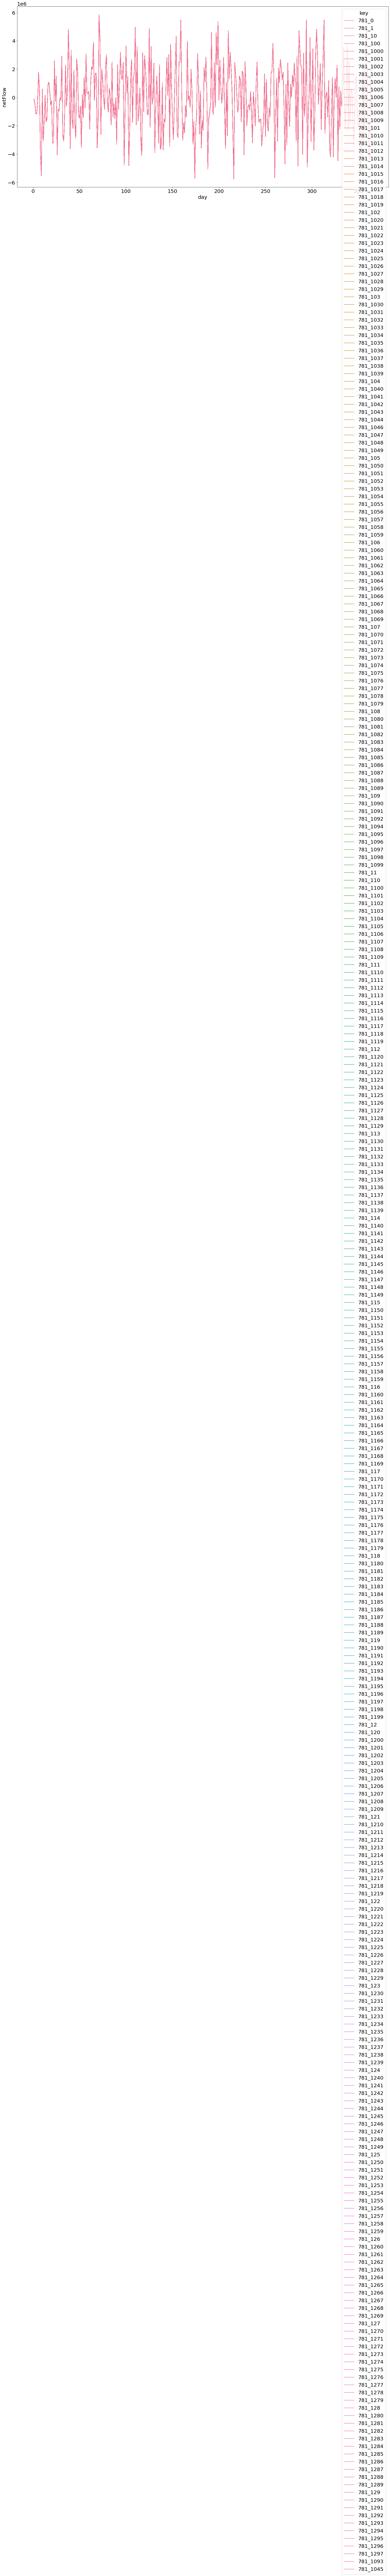

In [140]:
fig, axs = plt.subplots(ncols=1)
sns.lineplot(data=df2, x="day", y='netFlow', hue="key")

Yay you can see the thing bounce up and down across the year.

Let's see what happens within a single seed across all its keys

In [144]:
df3 = df.query("seed == 781")
df3.head(10)

,key,seed,maxLiqRatio,askFactor,cushionFactor,wall,cushion,mintSyncPremium,withReinstateWindow,withDynamicRR,avg_netflow,stdev_netflow,avg_marketcap,stdev_marketcap,avg_price,stdev_price
2152,781_116,781,0.475,0.090,0.300,0.23,0.19,3,Yes,No,-33530.44514,2445487.174,3.736015e+09,2.425378e+09,56.692689,18.872296
3656,781_1296,781,0.500,0.090,0.375,0.24,0.17,3,No,No,-33530.44514,2445487.174,3.915248e+09,2.552898e+09,59.301425,20.132454
3663,781_127,781,0.500,0.090,0.475,0.23,0.19,3,Yes,No,-33530.44514,2445487.174,3.810338e+09,2.542724e+09,57.393223,19.565265
6286,781_100,781,0.475,0.090,0.250,0.20,0.18,3,Yes,No,-33530.44514,2445487.174,3.388008e+09,2.189048e+09,51.407712,15.850140
6808,781_119,781,0.475,0.090,0.450,0.23,0.20,3,Yes,No,-33530.44514,2445487.174,3.740868e+09,2.434161e+09,56.750372,19.015941
7614,781_128,781,0.500,0.090,0.500,0.23,0.19,3,Yes,No,-33530.44514,2445487.174,3.807318e+09,2.540691e+09,57.346979,19.539098
13279,781_1248,781,0.500,0.090,0.375,0.26,0.18,2,No,No,-33530.44514,2445487.174,3.520152e+09,2.103351e+09,54.952377,16.835212
14473,781_1008,781,0.500,0.045,0.375,0.26,0.17,3,No,No,-33530.44514,2445487.174,3.930152e+09,2.460592e+09,60.403128,19.561973
14598,781_1294,781,0.475,0.045,0.400,0.24,0.17,1,Yes,No,-33530.44514,2445487.174,3.387256e+09,1.948365e+09,53.356867,16.178195
14757,781_12,781,0.500,0.045,0.100,0.28,0.20,1,No,Yes,-33530.44514,2445487.174,3.634498e+09,2.126473e+09,57.246806,18.406443
